In [1]:
from relaxation_method import *
from multiprocessing import Process,Queue,Pool
import scipy.integrate as integrate
import scipy.interpolate as interpolate
import scipy.optimize as optimize
import matplotlib.pyplot as plt
from timeout import timeout
import numpy as np
np.set_printoptions(precision=4,suppress=False)

# Overview

Bosonstar extends the relaxation_method module. It also contains 4 useful functions to call bosonstar called get_profiles, get_compactness, get_density, and scan

- get_profiles: returns the radius r and a matrix y which containts the profiles of the scalar fields and the metric. $A = y(0,:)$, $\Phi_{1}$ = y(1,:), $\Phi_{2}$ = y(2,:), $\frac{d \Phi_1}{dr}$ = y(3,:), $\frac{d \Phi_2}{dr}$ = y(4,:), $B$ = y(5,:), $\mu_1$ = y(6,:), $\mu_2$ = y(7,:).  It also returns the object from the relaxation_method. 

- get_compactness: returns the compactness and total mass of the boson star  

- get_density: returns the dimensionless central density and radius 

- scan: clean way to do multiprocessing.  Number cores = min(input, length of values). Returns dictionary results of the inital conditions of the phi fileds, mass, compactness, mass and compactness of just the second phi field contribution, central radius and central density. 


In [2]:
from bosonstar import get_profiles,get_compactness,get_density,scan

# Main inputs

The main inputs are the couplings, masses of the two scalar fields, and fr which corresponds to the decay scale. fr is used to calculate the dimensionless couplings used in the code.  

In [7]:
 kwargs = dict(lam1=1,lam2=1,lam12=1,m1=1e-10,m2=1e-10,fr=1e17)

# Plot profiles from get_profiles
-input is the central density of the first scalar field followed by the seconde and the kwargs 

-prints results from get_compactness and shows that you can have accesses to the object of the class returned by get_profiles.  It inherets self from the bosonstar module and relaxation_method. 

1186.1602029854337
0.22670339043506152 6.219034189577394 3.7186945991072995 0.0034398165871937967
(0.22670339043506152, 6.219034189577394, 3.7186945991072995, 0.0034398165871937967)
{'err': [0.011624424396056194, 0.016049590829075776, 0.0005447214590002041, 6.135912089338315e-07, 1.9084066441583615e-11], 'iterations': [0, 1, 2, 3, 4], 'successful': True}


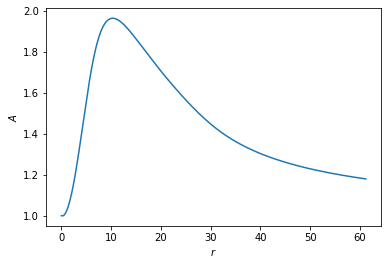

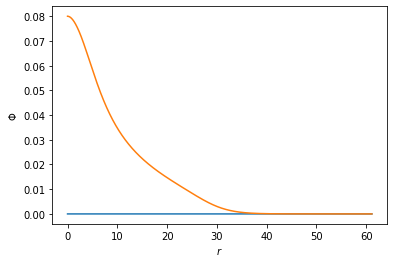

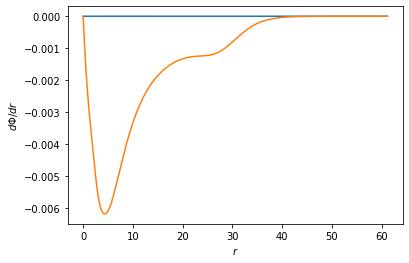

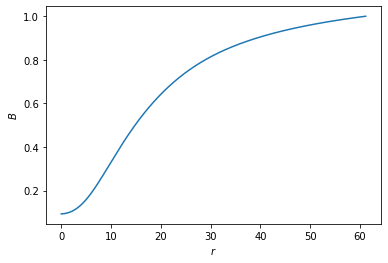

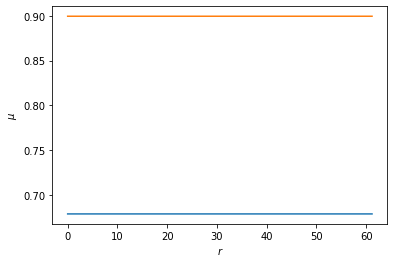

In [8]:
x,y,res = get_profiles(0,0.08,**kwargs)
print(res.lam2)
C,M = get_compactness(x,y,res)
rc,rho = get_density(x,y,res)
print(C,M,rc,rho)
print(res.findMbs(x,y))
print(res.dic)
plt.xlabel('$r$'); plt.ylabel(r'$A$')
plt.plot(x,y[0,:])
plt.show()
plt.xlabel('$r$'); plt.ylabel(r'$\Phi$')
plt.plot(x,y[1,:],x,y[2,:])
plt.show()
plt.xlabel('$r$'); plt.ylabel(r'$d\Phi / dr$')
plt.plot(x,y[3,:],x,y[4,:])
plt.show()
plt.xlabel('$r$'); plt.ylabel(r'$B$')
plt.plot(x,y[5,:])
plt.show()
plt.xlabel('$r$'); plt.ylabel(r'$\mu$')
plt.plot(x,y[6,:],x,y[7,:])
plt.show()

# Scan 

Perform linear scan over central densities and plot the compactness vs total mass. Results is a dictionary that contains "Cbs", "Mbs", "Phi1c", "Phi2c", "Rc","Rhoc","M2bs","C2bs". Number of cores is specified by cores = 50.  If 50 is less than length of the phis input then the number of cores will be set to the length of the phis. 

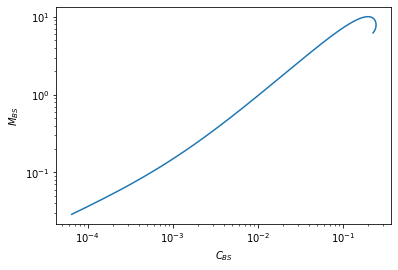

In [5]:
phi2 = 10**(np.linspace(np.log10(1e-4),np.log10(8e-2),30))
phi1 = np.zeros_like(phi2)
phis = np.column_stack((phi1,phi2))
results = scan(phis,cores=30,**kwargs)
kwinterp = {"kind":"cubic","bounds_error":False,"fill_value":(np.nan,)}
C = interpolate.interp1d(results["phi2c"],results["Cbs"],**kwinterp)
M = interpolate.interp1d(results["phi2c"],results["Mbs"],**kwinterp)
phi = np.linspace(phi2[0],phi2[-1],len(phi2)*100)

plt.xlabel('$C_{BS}$');plt.ylabel('$M_{BS}$')
plt.plot(C(phi),M(phi))
plt.xscale('log')
plt.yscale('log')
plt.show()

# Scan

Plot of Rho_c vs R_c but this time evaluate on a grid as opposed to a linear scan. The plot slices out the the central densities of phi1 to draw a smooth plot as opposed to a scatter. Phi1 and Phi2 can both be numpy arrays or lists. 

In [ ]:
phi1 = [0,1e-3]
phi2 = 10**(np.linspace(np.log10(1e-8),np.log10(8e-2),25))
phi1,phi2 = np.meshgrid(phi1,phi2)
phis = np.column_stack((phi1.ravel(),phi2.ravel()))
results = scan(phis,cores=50,**kwargs)

In [ ]:
rc = np.array(results["Rc"])
rho = np.array(results["Rhoc"])
p1 = np.array(results["phi1c"])
for p0 in [0,1e-3]:
    l = np.where( p1 == p0)
    plt.plot(rc[l],rho[l])
plt.xlabel(r'$\tilde{R}_c$');plt.ylabel(r'$\tilde{\rho}_c$')
plt.yscale('log')
plt.xscale('log')
plt.show()